In [1]:
import numpy as np
import matplotlib. pyplot as plt

plt.rcParams["figure.figsize"]=(10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

np.random.seed(0)
N=1000
D=2
K=3
X = np.zeros((N*K, D))
y=np.zeros(N*K,dtype=np.uint8)

In [2]:
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4, N) + np.random.randn(N) * 0.2
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

W = 0.01 * np.random.randn(D,K)
b= np.zeros((1,K))

iteration 0 loss 1.0989017647958428
iteration 100 loss 0.9454693002889141
iteration 200 loss 0.9454692993818608
iteration 300 loss 0.945469299381854
iteration 400 loss 0.9454692993818539
iteration 500 loss 0.945469299381854
iteration 600 loss 0.9454692993818539
iteration 700 loss 0.9454692993818539
iteration 800 loss 0.9454692993818539
iteration 900 loss 0.9454692993818539
iteration 1000 loss 0.9454692993818539
iteration 1100 loss 0.9454692993818539
iteration 1200 loss 0.9454692993818539
iteration 1300 loss 0.9454692993818539
iteration 1400 loss 0.9454692993818539
iteration 1500 loss 0.9454692993818539
iteration 1600 loss 0.9454692993818539
iteration 1700 loss 0.9454692993818539
iteration 1800 loss 0.9454692993818539
iteration 1900 loss 0.9454692993818539
iteration 2000 loss 0.9454692993818539
iteration 2100 loss 0.9454692993818539
iteration 2200 loss 0.9454692993818539
iteration 2300 loss 0.9454692993818539
iteration 2400 loss 0.9454692993818539
iteration 2500 loss 0.9454692993818539


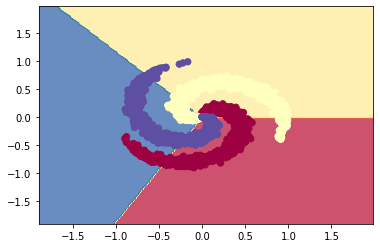

In [3]:
import math

step_size = 1
reg=math.exp(-3)

num_examples = X.shape[0]

for i in range(3000):
  scores = np.dot(X, W) + b
  exp_scores = np.exp(scores)
  probs = exp_scores/np.sum(exp_scores,axis=1, keepdims=True)
  corect_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5 * reg * np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 100 == 0:
    print("iteration {} loss {}".format(i,loss))
  
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  dW = np.dot(X.T,dscores)
  db = np.sum(dscores,axis=0,keepdims=True)

  dW +=reg * W

  W += -step_size * dW
  b += -step_size * db
  scores = np.dot(X,W) + b

predicted_class = np.argmax(scores,axis=1)
print("training accuracy: {}".format(np.mean(predicted_class == y)))

h=0.02
x_min,x_max = X[:,0].min()-1,X[:,0].max() +1
y_min,y_max = X[:,1].min()-1,X[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = np.dot(np.c_[xx.ravel(),yy.ravel()],W) + b
Z = np.argmax(Z,axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()

plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.show()